In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [2]:
df1 = pd.read_csv("secondary_data.csv", sep = ';')

In [3]:
df1.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [4]:
df1.shape

(61069, 21)

In [5]:
#df1.isnull().sum()

In [6]:
#df1.describe()

# EDA

In [7]:
# Removing columns with missing values 

df1.drop(columns=['veil-type', 'stem-root', 'veil-color',
                 'spore-print-color'], inplace=True)

In [8]:
df1.shape

(61069, 17)

<AxesSubplot:>

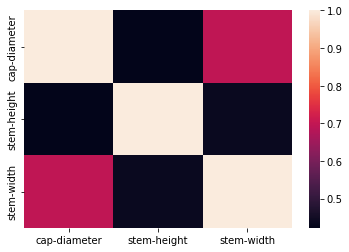

In [21]:
# calculate the correlation matrix
corr = df1.corr()

# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [9]:
for col in df1.columns:
    print(col, df1[col].unique())

class ['p' 'e']
cap-diameter [15.26 16.6  14.07 ... 22.85 21.8  20.42]
cap-shape ['x' 'f' 'p' 'b' 'c' 's' 'o']
cap-surface ['g' 'h' nan 't' 'y' 'e' 's' 'l' 'd' 'w' 'i' 'k']
cap-color ['o' 'e' 'n' 'g' 'r' 'w' 'y' 'p' 'u' 'b' 'l' 'k']
does-bruise-or-bleed ['f' 't']
gill-attachment ['e' nan 'a' 'd' 's' 'x' 'p' 'f']
gill-spacing [nan 'c' 'd' 'f']
gill-color ['w' 'n' 'p' 'u' 'b' 'g' 'y' 'r' 'e' 'o' 'k' 'f']
stem-height [16.95 17.99 17.8  ...  1.23  1.16  0.  ]
stem-width [17.09 18.19 17.74 ... 32.59 30.99 30.51]
stem-surface ['y' nan 's' 'k' 'i' 'h' 't' 'g' 'f']
stem-color ['w' 'y' 'n' 'u' 'b' 'l' 'r' 'p' 'e' 'k' 'g' 'o' 'f']
has-ring ['t' 'f']
ring-type ['g' 'p' 'e' 'l' 'f' 'm' nan 'r' 'z']
habitat ['d' 'm' 'g' 'h' 'l' 'p' 'w' 'u']
season ['w' 'u' 'a' 's']


# The target classes breakdown:

<AxesSubplot:>

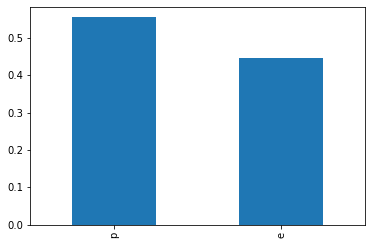

In [10]:
target_pcts = df1['class'].value_counts(normalize=True)
target_pcts.plot(kind='bar')

# Visualization of original categorical features:

x is the convex shape cap of a mushrroom


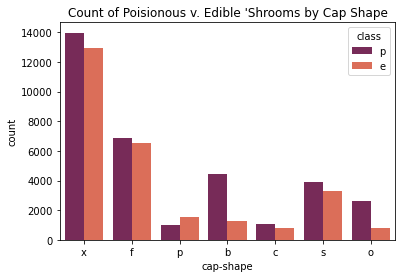

In [23]:
sns.countplot(data=df1, x='cap-shape', hue='class', palette='rocket').set(title='Count of Poisionous v. Edible \'Shrooms by Cap Shape')

print("x is the convex shape cap of a mushrroom")

[Text(0.5, 1.0, "Count of Poisionous v. Edible 'Shrooms by Cap Color")]

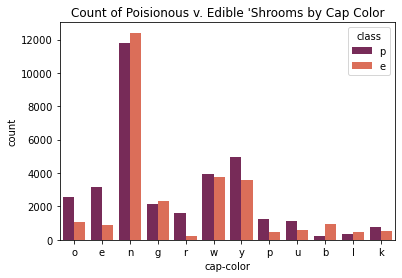

In [25]:
sns.countplot(data=df1, x='cap-color', hue='class', palette='rocket').set(title='Count of Poisionous v. Edible \'Shrooms by Cap Color')

[Text(0.5, 1.0, "Count of Poisionous v. Edible 'Shrooms by Gill Color")]

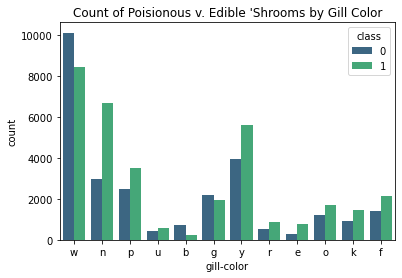

In [89]:
sns.countplot(data=df1, x='gill-color', hue='class', palette='viridis').set(title='Count of Poisionous v. Edible \'Shrooms by Gill Color')

In [38]:
#df2 = df1.copy(deep = True)

In [39]:
#df2.head()

In [ ]:
# feature engineered the class feature into binary numbers
df1['class'].replace({'p':1, 'e':0}, inplace=True)
df1['class'].value_counts()

n indicates color 'Brown' and  is the most common color in both posisonous and edible mushrooms

# Modeling Pre-Processing:

In [40]:
from sklearn.model_selection import train_test_split
#TRAIN_TEST_SPLIT (80/20)

#CREATE TRAIN/VALIDATION/TEST SETS

#set X and y as datasets

X = df1.loc[:,['cap-diameter','stem-height', 'stem-width']]
y = df1['class']

#Split data into two sections: Train+Val, Testing

#results in 20 test, 80 training

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=20)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=40)

In [92]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, fbeta_score
from sklearn.metrics import confusion_matrix, roc_curve
import sklearn.metrics as metrics

In [42]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Modeling

In [93]:
# Logistic Regression

lg_model = LogisticRegression(max_iter=200, C=10000)
lg_model.fit(X_train, y_train)

lg_y_pred_val = lg_model.predict(X_val)
print(' Logistic Regression train score:',lg_model.score(X_train, y_train))

print(' Logistic Regression validation metrics: \n Accuracy: %.4f \n Recall: %.4f \n fbeta_score: %.4f' %
          (metrics.accuracy_score(y_val , lr_y_pred_val),
           metrics.recall_score(y_val, lr_y_pred_val),
          metrics.fbeta_score(y_val, lr_y_pred_val, beta = 0.7))
     )

 Logistic Regression train score: 0.5893943942577986
 Logistic Regression validation metrics: 
 Accuracy: 0.5888 
 Recall: 0.8070 
 fbeta_score: 0.6496


In [95]:
# K Nearest Neighbors

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print(' Knn train score:',knn.score(X_train, y_train))

knn_y_pred_val = knn.predict(X_val)

print(' K Nearest Neighbors validation metrics: \n Accuracy: %.4f \n Recall: %.4f \n fbeta_score: %.4f' %
          (metrics.accuracy_score(y_val , knn_y_pred_val),
           metrics.recall_score(y_val, knn_y_pred_val),
          metrics.fbeta_score(y_val, knn_y_pred_val, beta = 0.7))
     )

 Knn train score: 0.8567997598318823
 K Nearest Neighbors validation metrics: 
 Accuracy: 0.7911 
 Recall: 0.8120 
 fbeta_score: 0.8101


In [96]:
# Decision Tree Classifier 
dt_model = DecisionTreeClassifier(random_state = 0, max_depth = 15)
dt_model.fit(X_train, y_train)
print(' Decision Tree Classifier train score:',dt_model.score(X_train, y_train))

dt_y_pred_val = dt_model.predict(X_val)

print(' Decision Tree Classifier  validation metrics: \n Accuracy: %.4f \n Recall: %.4f \n fbeta_score: %.4f' %
          (metrics.accuracy_score(y_val , dt_y_pred_val),
           metrics.recall_score(y_val, dt_y_pred_val),
          metrics.fbeta_score(y_val, dt_y_pred_val, beta = 0.7))
     )

 Decision Tree Classifier train score: 0.8302175158974919
 Decision Tree Classifier  validation metrics: 
 Accuracy: 0.7541 
 Recall: 0.7265 
 fbeta_score: 0.7790


In [97]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators = 1000)
rf_classifier.fit(X_train, y_train)
print(' Random Forest Classifier train score:',rf_classifier.score(X_train, y_train))

rf_y_pred_val = rf_classifier.predict(X_val)

print(' Random Forest Classifier  validation metrics: \n Accuracy: %.4f \n Recall: %.4f \n fbeta_score: %.4f' %
          (metrics.accuracy_score(y_val , rf_y_pred_val),
           metrics.recall_score(y_val, rf_y_pred_val),
          metrics.fbeta_score(y_val, rf_y_pred_val, beta = 0.7))
     )

 Random Forest Classifier train score: 0.9999181245053356
 Random Forest Classifier  validation metrics: 
 Accuracy: 0.7966 
 Recall: 0.8134 
 fbeta_score: 0.8155


In [98]:
# XGBoost Classifier

xgbc = XGBClassifier(use_label_encoder=False, n_estimators=100,
                       max_depth=20,
                       objective="reg:squarederror",  
                       learning_rate=.1, 
                       subsample=1,
                       min_child_weight=1,
                       colsample_bytree=.8)
xgbc.fit(X_train, y_train)
print(' Random Forest Classifier train score:',xgbc.score(X_train, y_train))

xgbc_y_pred_val = xgbc.predict(X_val)

print(' Random Forest Classifier  validation metrics: \n Accuracy: %.4f \n Recall: %.4f \n fbeta_score: %.4f' %
          (metrics.accuracy_score(y_val , xgbc_y_pred_val),
           metrics.recall_score(y_val, xgbc_y_pred_val),
          metrics.fbeta_score(y_val, xgbc_y_pred_val, beta = 0.7))
     )

 Random Forest Classifier train score: 0.9999181245053356
 Random Forest Classifier  validation metrics: 
 Accuracy: 0.7263 
 Recall: 0.7527 
 fbeta_score: 0.7514


##  Model selection based on the ROC for the 4 existing models:

<Figure size 360x360 with 0 Axes>

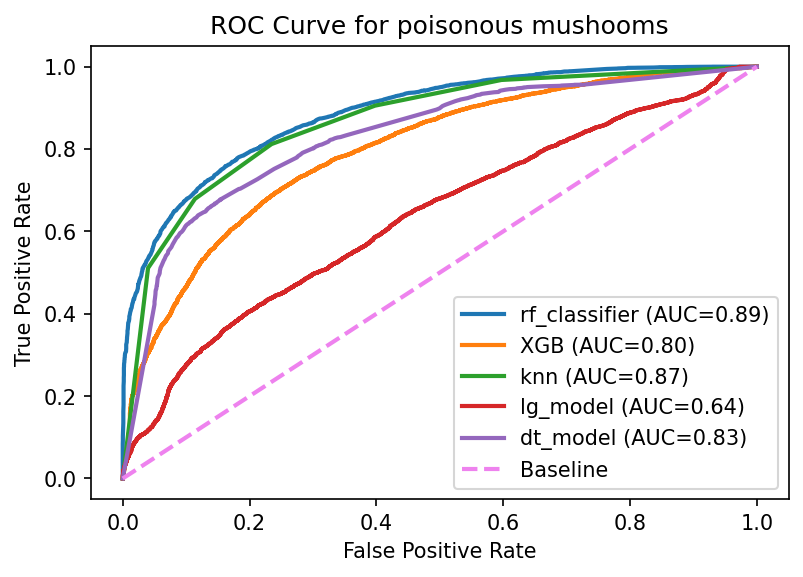

In [91]:
# ROC curve for all 4 models

plt.figure(figsize=(5, 5))
plt.figure(dpi=150)
fpr1, tpr1, thresholds1 = roc_curve(y_val, rf_classifier.predict_proba(X_val)[:,1])
fpr2, tpr2, thresholds2 = roc_curve(y_val, xgbc.predict_proba(X_val)[:,1])
fpr3, tpr3, thresholds3 = roc_curve(y_val, knn.predict_proba(X_val)[:,1])
fpr4, tpr4, thresholds4 = roc_curve(y_val, lg_model.predict_proba(X_val)[:,1])
fpr5, tpr5, thresholds5 = roc_curve(y_val, dt_model.predict_proba(X_val)[:,1])



plt.plot(fpr1, tpr1,lw=2, label=f'rf_classifier (AUC={roc_auc_score(y_val, rf_classifier.predict_proba(X_val)[:,1]):.2f})')
plt.plot(fpr2, tpr2,lw=2, label=f'XGB (AUC={roc_auc_score(y_val, xgbc.predict_proba(X_val)[:,1]):.2f})')
plt.plot(fpr3, tpr3,lw=2, label=f'knn (AUC={roc_auc_score(y_val, knn.predict_proba(X_val)[:,1]):.2f})')
plt.plot(fpr4, tpr4,lw=2, label=f'lg_model (AUC={roc_auc_score(y_val, lg_model.predict_proba(X_val)[:,1]):.2f})')
plt.plot(fpr5, tpr5,lw=2, label=f'dt_model (AUC={roc_auc_score(y_val, dt_model.predict_proba(X_val)[:,1]):.2f})')
plt.plot([0,1],[0,1],lw=2, c='violet',ls='--', label='Baseline')

plt.legend(loc='lower right')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for poisonous mushooms')

plt.savefig("ROC.png", bbox_inches='tight', dpi=600)

Random forest model showing the best results in the above graph. 
further adding more engineered features and tuning the hyperparameter 
to get over come the overfitting of the model


# Encoding the Categorical features into numerical values¶

In [75]:
df1.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-surface,stem-color,has-ring,ring-type,habitat,season
0,1,15.26,x,g,o,f,e,NaN,w,16.95,17.09,y,w,t,g,d,w
1,1,16.60,x,g,o,f,e,NaN,w,17.99,18.19,y,w,t,g,d,u
2,1,14.07,x,g,o,f,e,NaN,w,17.80,17.74,y,w,t,g,d,w
3,1,14.17,f,h,e,f,e,NaN,w,15.77,15.98,y,w,t,p,d,w
4,1,14.64,x,h,o,f,e,NaN,w,16.53,17.20,y,w,t,p,d,w


In [79]:
num_data = df1.loc[:,['cap-diameter','stem-height', 'stem-width']]
#num_data.head()

In [80]:
cat_data = df1.drop(columns=['cap-diameter','stem-height', 'stem-width'])
#cat_data.head()

In [83]:
labelencoder=LabelEncoder()
for col in cat_data.columns:
    cat_data[col] = labelencoder.fit_transform(cat_data[col])
cat_data.head()

,class,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-surface,stem-color,has-ring,ring-type,habitat,season
0,1,6,2,6,0,2,3,10,7,11,1,2,0,3
1,1,6,2,6,0,2,3,10,7,11,1,2,0,2
2,1,6,2,6,0,2,3,10,7,11,1,2,0,3
3,1,2,3,1,0,2,3,10,7,11,1,5,0,3
4,1,6,3,6,0,2,3,10,7,11,1,5,0,3


In [84]:
# concatenating along columns
new_df = pd.concat([num_data, cat_data], axis=1)
new_df.head()

,cap-diameter,stem-height,stem-width,class,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-surface,stem-color,has-ring,ring-type,habitat,season
0,15.26,16.95,17.09,1,6,2,6,0,2,3,10,7,11,1,2,0,3
1,16.60,17.99,18.19,1,6,2,6,0,2,3,10,7,11,1,2,0,2
2,14.07,17.80,17.74,1,6,2,6,0,2,3,10,7,11,1,2,0,3
3,14.17,15.77,15.98,1,2,3,1,0,2,3,10,7,11,1,5,0,3
4,14.64,16.53,17.20,1,6,3,6,0,2,3,10,7,11,1,5,0,3


In [85]:
new_df.to_csv('new_data1.csv')

In [ ]:
# Plotting the calculated feature importances by RF model

importance_df = pd.DataFrame(data=zip(X_train.columns, rf_classifier.feature_importances_))
importance_df.sort_values(by=[1], inplace=True)
plt.figure(figsize=(5, 12))
plt.barh(importance_df[0], importance_df[1])